# Statistical Analysis in Typhus Dataset


This code illustrates the content of the dataset 're-arranged-typhus-dataset.xlsx' the comes from the original file "MISC 56_updated_Chun_processing_20210827_part_1_codded.xlsx".

## Imports

Libraries to be used.

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

## Datasets

Directory where the files to be used are located and the name of the files.

In [24]:
directory = '/home/abraham/Documents/'
file = 're-arranged-typhus-dataset.xlsx'
filepath = directory + file

Once we have the file path we load the files as dataframes.

In [25]:
df_patients   = pd.read_excel(filepath, sheet_name='Sheet1')
df_patients

,Patient,MRN,Age (years),Gender,Race,Ethnicity,Zip Code,Insurance,Epidemiologic link to SARS-CoV-2,BMI,...,BMI %ile,Obese (≥ 95th percentile),ED presentation within first two hours met SIRS criteria (https://www.mdcalc.com/pediatric-sirs-sepsis-septic-shock-criteria#evidence),"If no, ED presentation within first 6 hours met SIRS criteria",Free text details to above,Highest temp in ED (within first two hours of presentation),Lowest systolic BP in ED (within first two hours of presentation),Lowest diastolic BP in ED (within first two hours of presentation),Highest heart rate in ED (within first two hours of presentation),Highest respiratory rate in ED (within first two hours of presentation)
0,-REMOVED-,AVDR31535,3.00,M,White,Hispanic,-REMOVED-,none,N,19.55,...,99.4,Y,Y,NaN,NaN,102.0,121.0,66.0,136.0,24.0
1,-REMOVED-,AVNS10984,2.00,M,Black,Non-hispanic,-REMOVED-,Medicaid,Y,18.31,...,94.3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-REMOVED-,BBAW70354,1.30,F,White,Hispanic,-REMOVED-,Medicaid,Y,16.34,...,62.9,N,Y,NaN,NaN,101.2,119.0,67.0,145.0,26.0
3,-REMOVED-,BCVI29284,6.00,M,White,Hispanic,-REMOVED-,private,N,16.35,...,70.7,N,Y,NaN,NaN,103.0,85.0,52.0,129.0,18.0
4,-REMOVED-,DJNE78378,3.00,F,White,Hispanic,-REMOVED-,CHIP,Y,15.81,...,60.7,N,N,Y,"became febrile, more tachycardic and tachypneic",97.6,96.0,61.0,110.0,24.0
5,-REMOVED-,EEVU65213,3.00,F,White,Hispanic,-REMOVED-,Medicaid,N,14.64,...,17.5,N,N,N,Remained afebrile but became hypotensive,100.2,86.0,53.0,153.0,44.0
6,-REMOVED-,FDFM93956,9.00,M,White,Hispanic,-REMOVED-,CHIP,N,17.83,...,75.2,N,Y,NaN,NaN,103.1,110.0,57.0,138.0,24.0
7,-REMOVED-,FLBZ45053,8.00,M,White,Hispanic,-REMOVED-,Medicaid,N,17.28,...,72.0,N,Y,NaN,NaN,103.1,102.0,59.0,155.0,38.0
8,-REMOVED-,FLVI53288,9.00,M,White,Non-Hispanic,-REMOVED-,private,N,21.61,...,96.0,Y,Y,NaN,NaN,102.1,105.0,64.0,160.0,30.0
9,-REMOVED-,FMZW24810,17.00,M,Black,Non-Hispanic,-REMOVED-,private,Y,28.49,...,95.0,Y,Y,NaN,NaN,100.6,102.0,51.0,106.0,16.0


Now we can see the data frame content: How many patients and age distribution of them.

How many patients in the dataset: 56


<AxesSubplot:xlabel='Age (Years)', ylabel='Patients'>

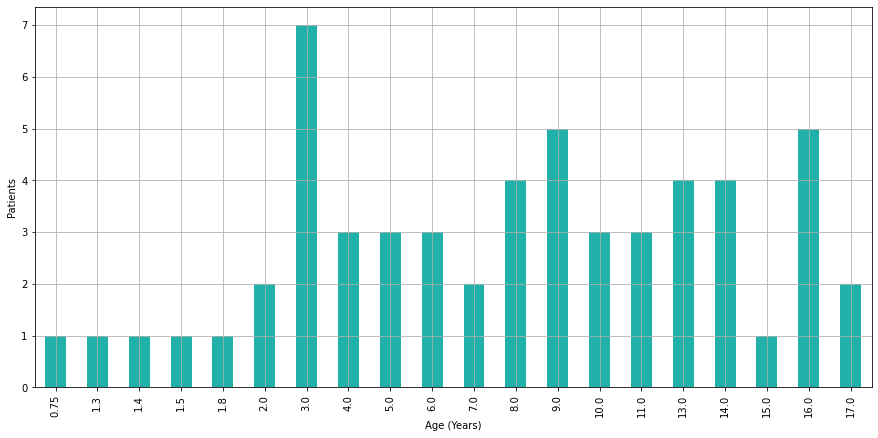

In [26]:
print('How many patients in the dataset:', len(df_patients['MRN'].unique()))
df_patients['Age (years)'].value_counts().sort_index().plot.bar(grid = True, xlabel = 'Age (Years)', ylabel = 'Patients', figsize=(15, 7), color = 'lightseagreen')

Now we'll see the gender proportion in the dataset.

<AxesSubplot:>

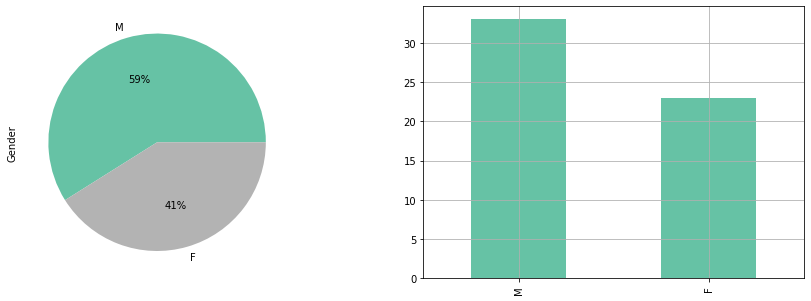

In [27]:
fig, axs = plt.subplots(1,2)
df_patients['Gender'] = df_patients['Gender'].str.strip()
df_patients['Gender'].value_counts().plot.pie(figsize=(15,5), colormap = 'Set2', autopct='%1.0f%%', ax=axs[0])
df_patients['Gender'].value_counts().plot.bar(figsize=(15,5), colormap = 'Set2', ax=axs[1], grid = True)

Now we choose to analyze the racial and ethnic distribution of the dataset.

<AxesSubplot:ylabel='Ethnicity'>

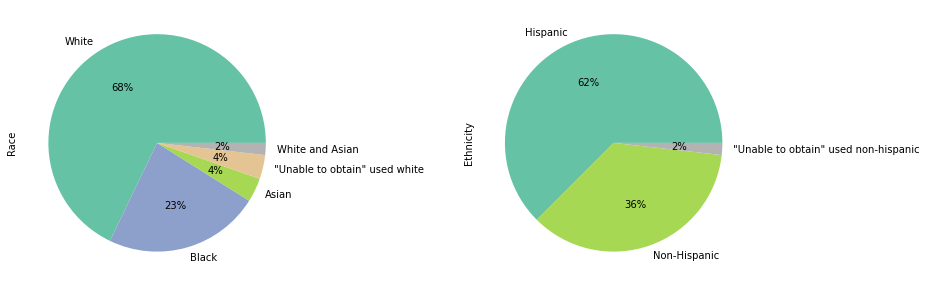

In [39]:
fig, axs = plt.subplots(1,2)
df_patients['Race'] = df_patients['Race'].str.strip()
df_patients['Ethnicity'] = df_patients['Ethnicity'].str.strip()
df_patients['Ethnicity'] = df_patients['Ethnicity'].str.replace('Non-hispanic', 'Non-Hispanic')
df_patients['Race'].value_counts().plot.pie(figsize=(15,5), ax=axs[0], colormap = 'Set2', autopct='%1.0f%%')
df_patients['Ethnicity'].value_counts().plot.pie(figsize=(15,5), ax=axs[1], colormap = 'Set2', autopct='%1.0f%%')

<AxesSubplot:ylabel='Race and Ethnicity'>

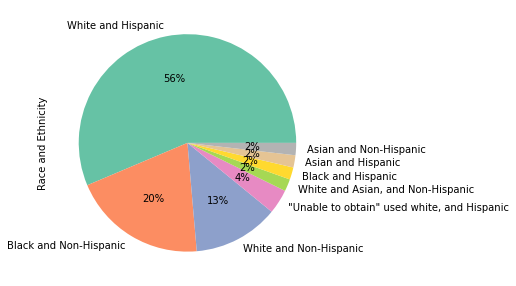

In [40]:
df_patients.loc[(df_patients['Race']=='White') & (df_patients['Ethnicity']=='Hispanic'), 'Race and Ethnicity'] = 'White and Hispanic'
df_patients.loc[(df_patients['Race']=='White') & (df_patients['Ethnicity']=='Non-Hispanic'), 'Race and Ethnicity'] = 'White and Non-Hispanic'
df_patients.loc[(df_patients['Race']=='White and Asian') & (df_patients['Ethnicity']=='Hispanic'), 'Race and Ethnicity'] = 'White and Asian, and Hispanic'
df_patients.loc[(df_patients['Race']=='White and Asian') & (df_patients['Ethnicity']=='Non-Hispanic'), 'Race and Ethnicity'] = 'White and Asian, and Non-Hispanic'
df_patients.loc[(df_patients['Race']=='Black') & (df_patients['Ethnicity']=='Hispanic'), 'Race and Ethnicity'] = 'Black and Hispanic'
df_patients.loc[(df_patients['Race']=='Black') & (df_patients['Ethnicity']=='Non-Hispanic'), 'Race and Ethnicity'] = 'Black and Non-Hispanic'
df_patients.loc[(df_patients['Race']=='Asian') & (df_patients['Ethnicity']=='Hispanic'), 'Race and Ethnicity'] = 'Asian and Hispanic'
df_patients.loc[(df_patients['Race']=='Asian') & (df_patients['Ethnicity']=='Non-Hispanic'), 'Race and Ethnicity'] = 'Asian and Non-Hispanic'
df_patients.loc[(df_patients['Race']=='"Unable to obtain" used white') & (df_patients['Ethnicity']=='Hispanic'), 'Race and Ethnicity'] = '"Unable to obtain" used white, and Hispanic'
df_patients.loc[(df_patients['Race']=='"Unable to obtain" used white') & (df_patients['Ethnicity']=='Non-Hispanic'), 'Race and Ethnicity'] = '"Unable to obtain" used white, and Non-Hispanic'
df_patients['Race and Ethnicity'].value_counts().plot.pie(figsize=(15,5), colormap = 'Set2', autopct='%1.0f%%')

<AxesSubplot:ylabel='Antecedent Illness'>

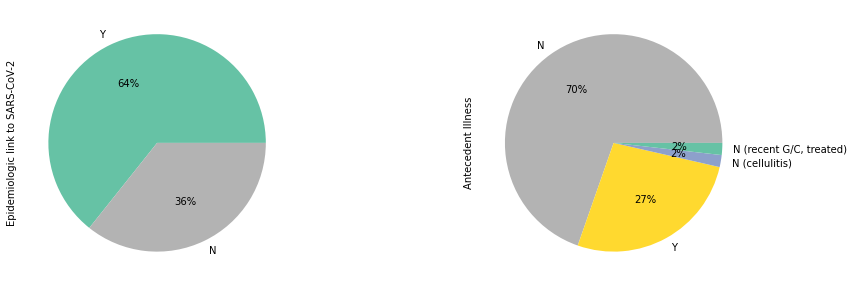

In [30]:
fig, axs = plt.subplots(1,2)
df_patients['Epidemiologic link to SARS-CoV-2'] = df_patients['Epidemiologic link to SARS-CoV-2'].str.strip()
df_patients['Epidemiologic link to SARS-CoV-2'].value_counts().plot.pie(figsize=(15,5), ax=axs[0], colormap = 'Set2', autopct='%1.0f%%')
df_patients['Antecedent Illness'] = df_patients['Antecedent Illness'].str.strip()
df_patients['Antecedent Illness'].value_counts().plot.pie(figsize=(15,5), ax=axs[1], colormap = 'Set2_r', autopct='%1.0f%%')

<AxesSubplot:ylabel='Obese (≥ 95th percentile)'>

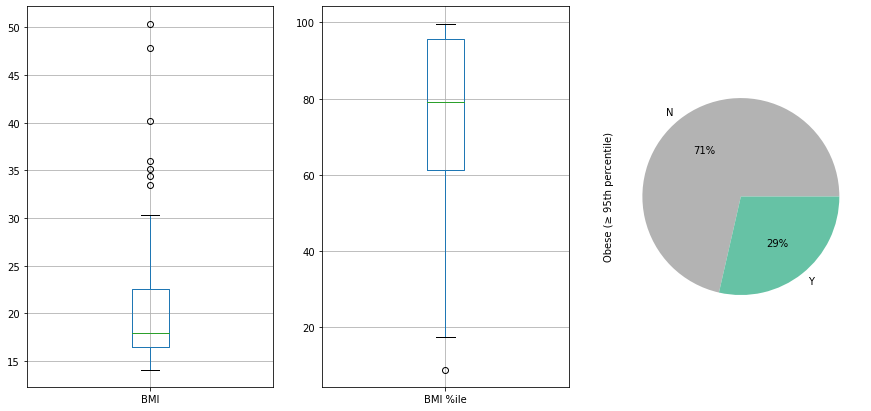

In [171]:
fig, axs = plt.subplots(1,3)
df_patients['BMI'].plot.box(figsize=(15, 7), ax=axs[0], grid = True)
df_patients['BMI %ile'].plot.box(figsize=(15, 7), ax=axs[1], grid = True)
df_patients['Obese (≥ 95th percentile)'].value_counts().plot.pie(figsize=(15,7), ax=axs[2], colormap = 'Set2_r', autopct='%1.0f%%')

<AxesSubplot:ylabel='Days'>

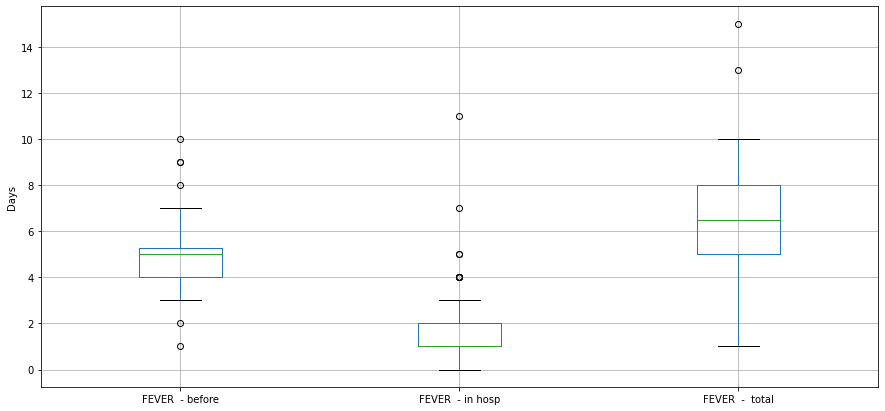

In [21]:
df_fever = pd.DataFrame(df_patients, columns=['FEVER  - before', 'FEVER  - in hosp', 'FEVER  -  total'])
df_fever.plot.box(figsize=(15, 7), grid = True, ylabel = 'Days')

<AxesSubplot:>

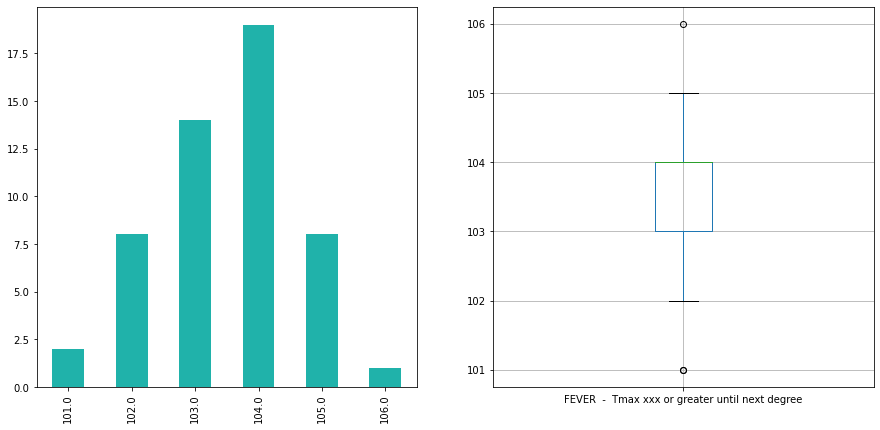

In [167]:
fig, axs = plt.subplots(1,2)
df_patients['FEVER  -  Tmax xxx or greater until next degree'].value_counts().sort_index().plot.bar(figsize=(15, 5), ax=axs[0], color = 'lightseagreen')
df_patients['FEVER  -  Tmax xxx or greater until next degree'].plot.box(figsize=(15, 7), ax=axs[1], grid = True)

<AxesSubplot:ylabel='Adenopathy'>

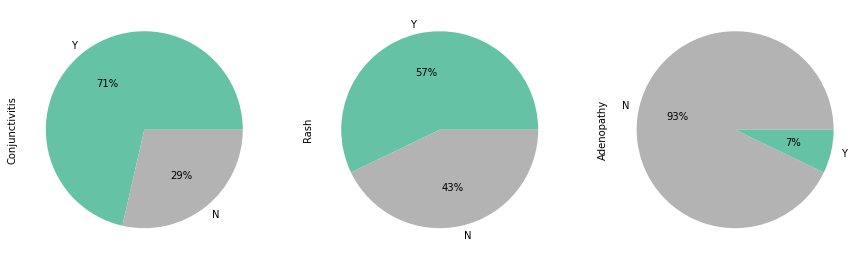

In [66]:
fig, axs = plt.subplots(1,3)
df_patients['Conjunctivitis'] = df_patients['Conjunctivitis'].str.strip()
df_patients['Conjunctivitis'].value_counts().plot.pie(figsize=(15,5), ax=axs[0], colormap = 'Set2', autopct='%1.0f%%')
df_patients['Rash'] = df_patients['Rash'].str.strip()
df_patients['Rash'].value_counts().plot.pie(figsize=(15,5), ax=axs[1], colormap = 'Set2', autopct='%1.0f%%')
df_patients['Adenopathy'].value_counts().plot.pie(figsize=(15,5), ax=axs[2], colormap = 'Set2_r', autopct='%1.0f%%')

Once we have already shown that the missing elements of the admissions list are also in the demographic data list, we print the list of missing MRNs.

<AxesSubplot:ylabel='GI involvement (nausea/vomiting, abdominal pain, diarrhea)'>

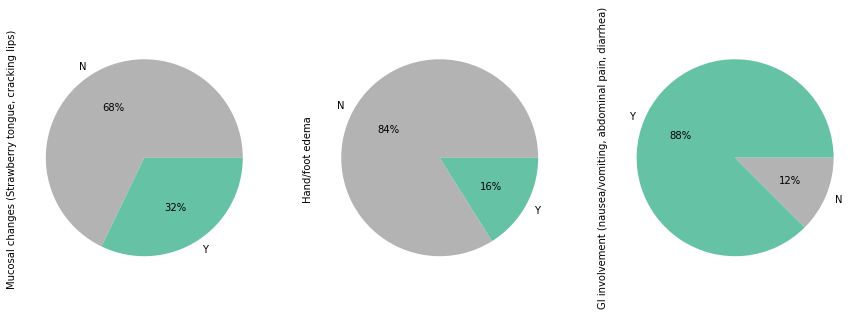

In [67]:
fig, axs = plt.subplots(1,3)
df_patients['Mucosal changes (Strawberry tongue, cracking lips) '] = df_patients['Mucosal changes (Strawberry tongue, cracking lips) '].str.strip()
df_patients['Mucosal changes (Strawberry tongue, cracking lips) '].value_counts().plot.pie(figsize=(15,5), ax=axs[0], colormap = 'Set2_r', autopct='%1.0f%%')
df_patients['Hand/foot edema '] = df_patients['Hand/foot edema '].str.strip()
df_patients['Hand/foot edema '].value_counts().plot.pie(figsize=(15,5), ax=axs[1], colormap = 'Set2_r', autopct='%1.0f%%')
df_patients['GI involvement (nausea/vomiting, abdominal pain, diarrhea)'] = df_patients['GI involvement (nausea/vomiting, abdominal pain, diarrhea)'].str.strip()
df_patients['GI involvement (nausea/vomiting, abdominal pain, diarrhea)'].value_counts().plot.pie(figsize=(15,5), ax=axs[2], colormap = 'Set2', autopct='%1.0f%%')

<AxesSubplot:ylabel='MSK involvement (arthralgias, arthritis, myalgias) '>

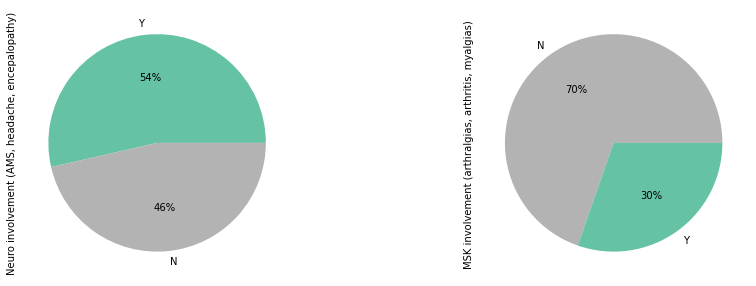

In [68]:
fig, axs = plt.subplots(1,2)
df_patients['Neuro involvement (AMS, headache, encepalopathy)'] = df_patients['Neuro involvement (AMS, headache, encepalopathy)'].str.strip()
df_patients['Neuro involvement (AMS, headache, encepalopathy)'].value_counts().plot.pie(figsize=(15,5), ax=axs[0], colormap = 'Set2', autopct='%1.0f%%')
df_patients['MSK involvement (arthralgias, arthritis, myalgias) '] = df_patients['MSK involvement (arthralgias, arthritis, myalgias) '].str.strip()
df_patients['MSK involvement (arthralgias, arthritis, myalgias) '].value_counts().plot.pie(figsize=(15,5), ax=axs[1], colormap = 'Set2_r', autopct='%1.0f%%')

<AxesSubplot:ylabel='Cardiac involvement (chest pain, arrhythmia)'>

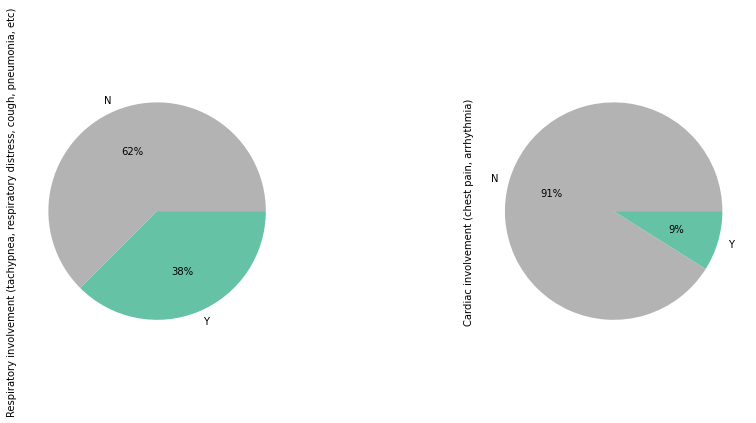

In [69]:
fig, axs = plt.subplots(1,2)
df_patients['Respiratory involvement (tachypnea, respiratory distress, cough, pneumonia, etc)'] = df_patients['Respiratory involvement (tachypnea, respiratory distress, cough, pneumonia, etc)'].str.strip()
df_patients['Respiratory involvement (tachypnea, respiratory distress, cough, pneumonia, etc)'].value_counts().plot.pie(figsize=(15,5), ax=axs[0], colormap = 'Set2_r', autopct='%1.0f%%')
df_patients['Cardiac involvement (chest pain, arrhythmia)'] = df_patients['Cardiac involvement (chest pain, arrhythmia)'].str.strip()
df_patients['Cardiac involvement (chest pain, arrhythmia)'].value_counts().plot.pie(figsize=(15,5), ax=axs[1], colormap = 'Set2_r', autopct='%1.0f%%')

In [41]:
df_patients.loc[(df_patients['Conjunctivitis']=='Y') & (df_patients['Rash']=='Y') & (df_patients['Adenopathy']=='Y') & (df_patients['Mucosal changes (Strawberry tongue, cracking lips) ']=='Y') & (df_patients['Hand/foot edema ']=='Y') & (df_patients['GI involvement (nausea/vomiting, abdominal pain, diarrhea)']=='Y') & (df_patients['Neuro involvement (AMS, headache, encepalopathy)']=='Y') & (df_patients['MSK involvement (arthralgias, arthritis, myalgias) ']=='Y') & (df_patients['Respiratory involvement (tachypnea, respiratory distress, cough, pneumonia, etc)']=='Y') & (df_patients['Cardiac involvement (chest pain, arrhythmia)']=='Y'), 'Clinicals'] = '10'

In [ ]:
df_patients.loc[(df_patients['Conjunctivitis']=='Y') & (df_patients['Rash']=='Y') & (df_patients['Adenopathy']=='Y') & (df_patients['Mucosal changes (Strawberry tongue, cracking lips) ']=='Y') & (df_patients['Hand/foot edema ']=='Y') & (df_patients['GI involvement (nausea/vomiting, abdominal pain, diarrhea)']=='Y') & (df_patients['Neuro involvement (AMS, headache, encepalopathy)']=='Y') & (df_patients['MSK involvement (arthralgias, arthritis, myalgias) ']=='Y') & (df_patients['Respiratory involvement (tachypnea, respiratory distress, cough, pneumonia, etc)']=='Y') & (df_patients['Cardiac involvement (chest pain, arrhythmia)']=='Y'), 'Clinicals'] = '9'
df_patients.loc[(df_patients['Conjunctivitis']=='Y') & (df_patients['Rash']=='Y') & (df_patients['Adenopathy']=='Y') & (df_patients['Mucosal changes (Strawberry tongue, cracking lips) ']=='Y') & (df_patients['Hand/foot edema ']=='Y') & (df_patients['GI involvement (nausea/vomiting, abdominal pain, diarrhea)']=='Y') & (df_patients['Neuro involvement (AMS, headache, encepalopathy)']=='Y') & (df_patients['MSK involvement (arthralgias, arthritis, myalgias) ']=='Y') & (df_patients['Respiratory involvement (tachypnea, respiratory distress, cough, pneumonia, etc)']=='Y') & (df_patients['Cardiac involvement (chest pain, arrhythmia)']=='Y'), 'Clinicals'] = '9'
df_patients.loc[(df_patients['Conjunctivitis']=='Y') & (df_patients['Rash']=='Y') & (df_patients['Adenopathy']=='Y') & (df_patients['Mucosal changes (Strawberry tongue, cracking lips) ']=='Y') & (df_patients['Hand/foot edema ']=='Y') & (df_patients['GI involvement (nausea/vomiting, abdominal pain, diarrhea)']=='Y') & (df_patients['Neuro involvement (AMS, headache, encepalopathy)']=='Y') & (df_patients['MSK involvement (arthralgias, arthritis, myalgias) ']=='Y') & (df_patients['Respiratory involvement (tachypnea, respiratory distress, cough, pneumonia, etc)']=='Y') & (df_patients['Cardiac involvement (chest pain, arrhythmia)']=='Y'), 'Clinicals'] = '9'
df_patients.loc[(df_patients['Conjunctivitis']=='Y') & (df_patients['Rash']=='Y') & (df_patients['Adenopathy']=='Y') & (df_patients['Mucosal changes (Strawberry tongue, cracking lips) ']=='Y') & (df_patients['Hand/foot edema ']=='Y') & (df_patients['GI involvement (nausea/vomiting, abdominal pain, diarrhea)']=='Y') & (df_patients['Neuro involvement (AMS, headache, encepalopathy)']=='Y') & (df_patients['MSK involvement (arthralgias, arthritis, myalgias) ']=='Y') & (df_patients['Respiratory involvement (tachypnea, respiratory distress, cough, pneumonia, etc)']=='Y') & (df_patients['Cardiac involvement (chest pain, arrhythmia)']=='Y'), 'Clinicals'] = '9'
df_patients.loc[(df_patients['Conjunctivitis']=='Y') & (df_patients['Rash']=='Y') & (df_patients['Adenopathy']=='Y') & (df_patients['Mucosal changes (Strawberry tongue, cracking lips) ']=='Y') & (df_patients['Hand/foot edema ']=='Y') & (df_patients['GI involvement (nausea/vomiting, abdominal pain, diarrhea)']=='Y') & (df_patients['Neuro involvement (AMS, headache, encepalopathy)']=='Y') & (df_patients['MSK involvement (arthralgias, arthritis, myalgias) ']=='Y') & (df_patients['Respiratory involvement (tachypnea, respiratory distress, cough, pneumonia, etc)']=='Y') & (df_patients['Cardiac involvement (chest pain, arrhythmia)']=='Y'), 'Clinicals'] = '9'
df_patients.loc[(df_patients['Conjunctivitis']=='Y') & (df_patients['Rash']=='Y') & (df_patients['Adenopathy']=='Y') & (df_patients['Mucosal changes (Strawberry tongue, cracking lips) ']=='Y') & (df_patients['Hand/foot edema ']=='Y') & (df_patients['GI involvement (nausea/vomiting, abdominal pain, diarrhea)']=='Y') & (df_patients['Neuro involvement (AMS, headache, encepalopathy)']=='Y') & (df_patients['MSK involvement (arthralgias, arthritis, myalgias) ']=='Y') & (df_patients['Respiratory involvement (tachypnea, respiratory distress, cough, pneumonia, etc)']=='Y') & (df_patients['Cardiac involvement (chest pain, arrhythmia)']=='Y'), 'Clinicals'] = '9'
df_patients.loc[(df_patients['Conjunctivitis']=='Y') & (df_patients['Rash']=='Y') & (df_patients['Adenopathy']=='Y') & (df_patients['Mucosal changes (Strawberry tongue, cracking lips) ']=='Y') & (df_patients['Hand/foot edema ']=='Y') & (df_patients['GI involvement (nausea/vomiting, abdominal pain, diarrhea)']=='Y') & (df_patients['Neuro involvement (AMS, headache, encepalopathy)']=='Y') & (df_patients['MSK involvement (arthralgias, arthritis, myalgias) ']=='Y') & (df_patients['Respiratory involvement (tachypnea, respiratory distress, cough, pneumonia, etc)']=='Y') & (df_patients['Cardiac involvement (chest pain, arrhythmia)']=='Y'), 'Clinicals'] = '9'
df_patients.loc[(df_patients['Conjunctivitis']=='Y') & (df_patients['Rash']=='Y') & (df_patients['Adenopathy']=='Y') & (df_patients['Mucosal changes (Strawberry tongue, cracking lips) ']=='Y') & (df_patients['Hand/foot edema ']=='Y') & (df_patients['GI involvement (nausea/vomiting, abdominal pain, diarrhea)']=='Y') & (df_patients['Neuro involvement (AMS, headache, encepalopathy)']=='Y') & (df_patients['MSK involvement (arthralgias, arthritis, myalgias) ']=='Y') & (df_patients['Respiratory involvement (tachypnea, respiratory distress, cough, pneumonia, etc)']=='Y') & (df_patients['Cardiac involvement (chest pain, arrhythmia)']=='Y'), 'Clinicals'] = '9'
df_patients.loc[(df_patients['Conjunctivitis']=='Y') & (df_patients['Rash']=='Y') & (df_patients['Adenopathy']=='Y') & (df_patients['Mucosal changes (Strawberry tongue, cracking lips) ']=='Y') & (df_patients['Hand/foot edema ']=='Y') & (df_patients['GI involvement (nausea/vomiting, abdominal pain, diarrhea)']=='Y') & (df_patients['Neuro involvement (AMS, headache, encepalopathy)']=='Y') & (df_patients['MSK involvement (arthralgias, arthritis, myalgias) ']=='Y') & (df_patients['Respiratory involvement (tachypnea, respiratory distress, cough, pneumonia, etc)']=='Y') & (df_patients['Cardiac involvement (chest pain, arrhythmia)']=='Y'), 'Clinicals'] = '9'
df_patients.loc[(df_patients['Conjunctivitis']=='Y') & (df_patients['Rash']=='Y') & (df_patients['Adenopathy']=='Y') & (df_patients['Mucosal changes (Strawberry tongue, cracking lips) ']=='Y') & (df_patients['Hand/foot edema ']=='Y') & (df_patients['GI involvement (nausea/vomiting, abdominal pain, diarrhea)']=='Y') & (df_patients['Neuro involvement (AMS, headache, encepalopathy)']=='Y') & (df_patients['MSK involvement (arthralgias, arthritis, myalgias) ']=='Y') & (df_patients['Respiratory involvement (tachypnea, respiratory distress, cough, pneumonia, etc)']=='Y') & (df_patients['Cardiac involvement (chest pain, arrhythmia)']=='Y'), 'Clinicals'] = '9'

<AxesSubplot:>

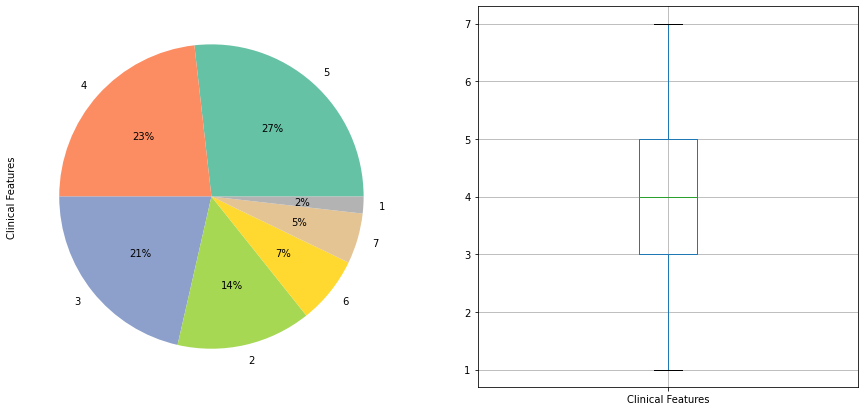

In [89]:
clinicals = df_patients[['Conjunctivitis', 'Rash', 'Adenopathy', 'Mucosal changes (Strawberry tongue, cracking lips) ', 'Hand/foot edema ', 'GI involvement (nausea/vomiting, abdominal pain, diarrhea)', 'Neuro involvement (AMS, headache, encepalopathy)', 'MSK involvement (arthralgias, arthritis, myalgias) ', 'Respiratory involvement (tachypnea, respiratory distress, cough, pneumonia, etc)', 'Cardiac involvement (chest pain, arrhythmia)']].replace(('Y','N'), (1,0)).sum(axis=1)
df_clinicals = pd.DataFrame(clinicals, columns=['Clinical Features'])
fig, axs = plt.subplots(1,2)
df_clinicals['Clinical Features'].value_counts().plot.pie(figsize=(15,5), ax=axs[0], colormap = 'Set2', autopct='%1.0f%%')
df_clinicals['Clinical Features'].plot.box(figsize=(15, 7), ax=axs[1], grid = True)

<AxesSubplot:ylabel='Met criteria for incomplete KD'>

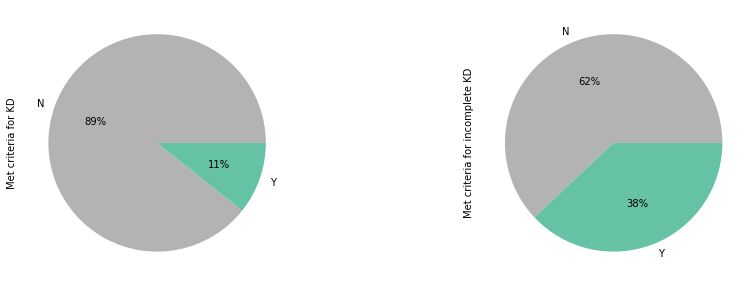

In [35]:
fig, axs = plt.subplots(1,2)
df_patients['Met criteria for KD'] = df_patients['Met criteria for KD'].str.strip()
df_patients['Met criteria for KD'].value_counts().plot.pie(figsize=(15,5), ax=axs[0], colormap = 'Set2_r', autopct='%1.0f%%')
df_patients['Met criteria for incomplete KD'] = df_patients['Met criteria for incomplete KD'].str.strip()
df_patients['Met criteria for incomplete KD'].value_counts().plot.pie(figsize=(15,5), ax=axs[1], colormap = 'Set2_r', autopct='%1.0f%%')

<AxesSubplot:ylabel='Required CPR'>

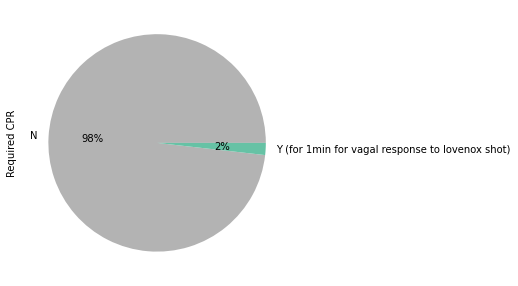

In [151]:
df_patients['Required CPR'] = df_patients['Required CPR'].str.strip()
df_patients['Required CPR'].value_counts().plot.pie(figsize=(15,5), colormap = 'Set2_r', autopct='%1.0f%%')

<AxesSubplot:ylabel='Highest level of care '>

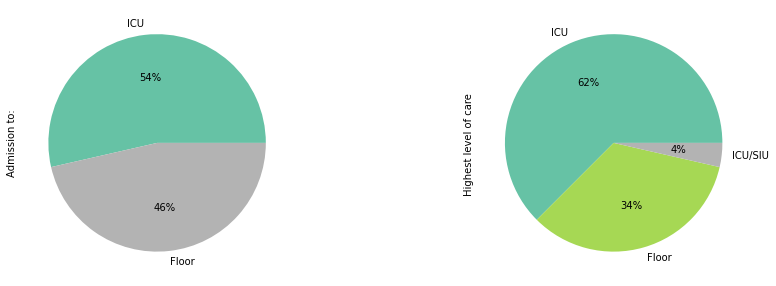

In [156]:
fig, axs = plt.subplots(1,2)
df_patients['Admission to:'] = df_patients['Admission to:'].str.strip()
df_patients['Admission to:'] = df_patients['Admission to:'].str.replace('floor', 'Floor')
df_patients['Admission to:'].value_counts().plot.pie(figsize=(15,5), ax=axs[0], colormap = 'Set2', autopct='%1.0f%%')
df_patients['Highest level of care '] = df_patients['Highest level of care '].str.strip()
df_patients['Highest level of care '] = df_patients['Highest level of care '].str.replace('floor', 'Floor')
df_patients['Highest level of care '].value_counts().plot.pie(figsize=(15,5), ax=axs[1], colormap = 'Set2', autopct='%1.0f%%')

<AxesSubplot:>

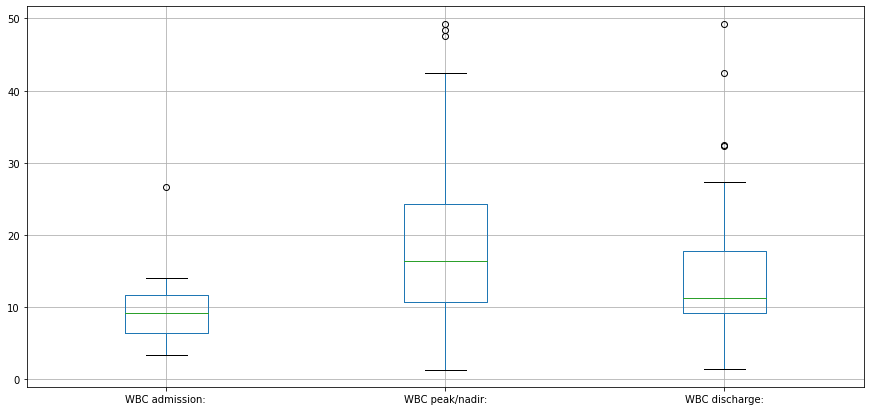

In [175]:
df_wbc = pd.DataFrame(df_patients, columns=['WBC admission: ', 'WBC peak/nadir:', 'WBC discharge:'])
df_wbc.plot.box(figsize=(15, 7), grid = True)

<ipython-input-181-6bc3d91867a0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_patients['ALC peak/nadir:'] = df_patients['ALC peak/nadir:'].str.replace('2.02 (note peak 22.01!)', '22.01')


<AxesSubplot:>

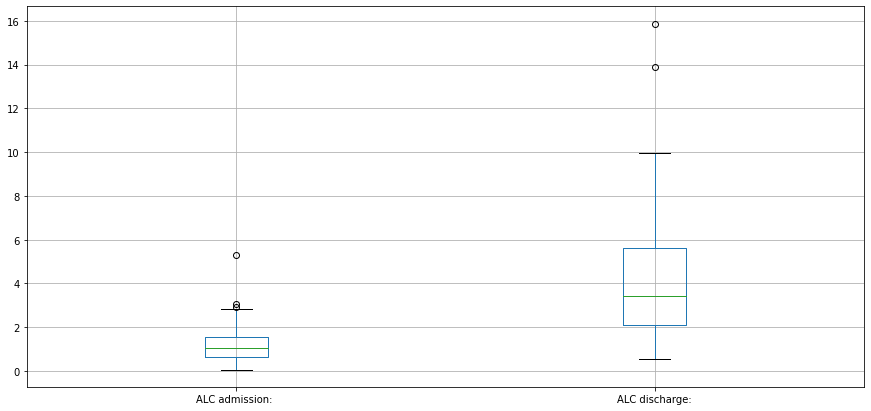

In [181]:
df_patients['ALC peak/nadir:'] = df_patients['ALC peak/nadir:'].str.replace('2.02 (note peak 22.01!)', '22.01')
df_alc = pd.DataFrame(df_patients, columns=['ALC admission: ', 'ALC peak/nadir:', 'ALC discharge:'])
df_alc.plot.box(figsize=(15, 7), grid = True)

<AxesSubplot:>

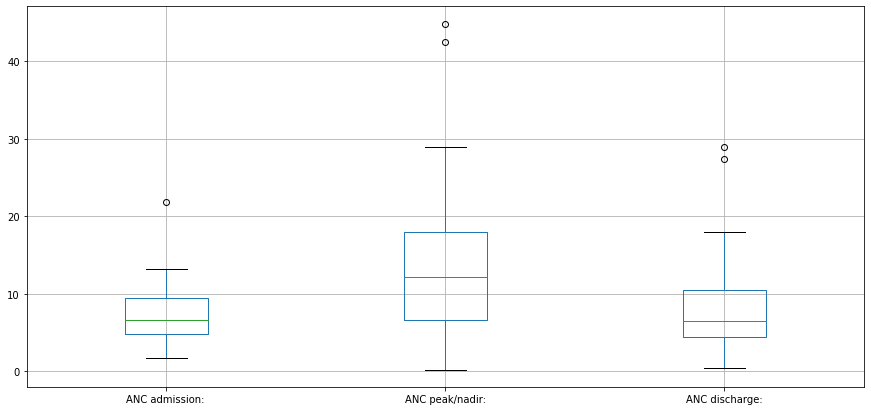

In [183]:
df_anc = pd.DataFrame(df_patients, columns=['ANC admission: ', 'ANC peak/nadir:', 'ANC discharge:'])
df_anc.plot.box(figsize=(15, 7), grid = True)

<AxesSubplot:>

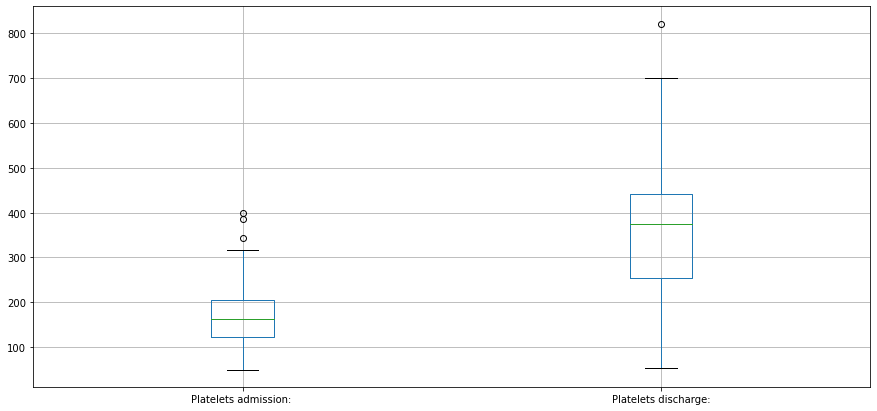

In [184]:
df_plat = pd.DataFrame(df_patients, columns=['Platelets admission: ', 'Platelets peak/nadir:', 'Platelets discharge:'])
df_plat.plot.box(figsize=(15, 7), grid = True)

<AxesSubplot:>

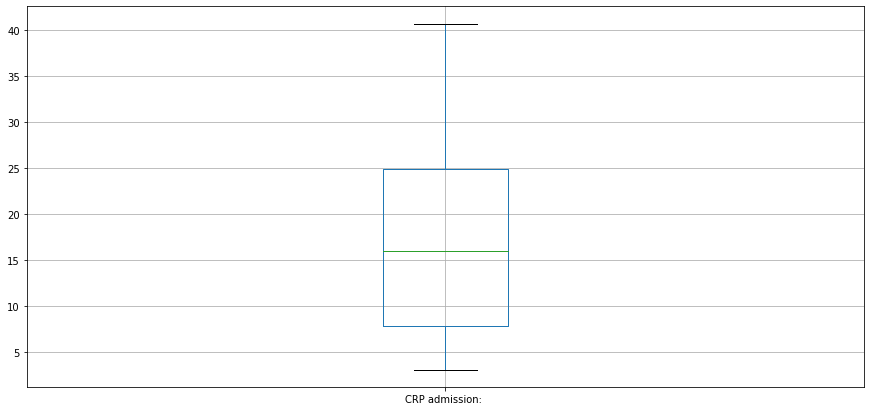

In [186]:
df_crp = pd.DataFrame(df_patients, columns=['CRP admission: ', 'CRP peak/nadir:', 'CRP discharge:'])
df_crp.plot.box(figsize=(15, 7), grid = True)

<AxesSubplot:>

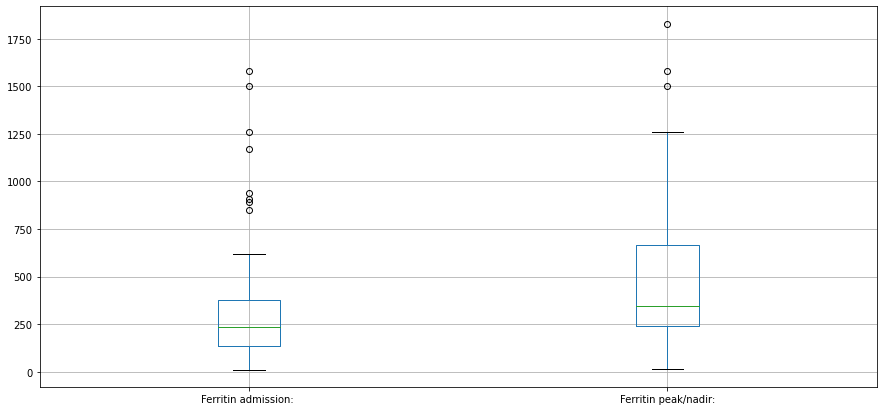

In [187]:
df_ferr = pd.DataFrame(df_patients, columns=['Ferritin admission: ', 'Ferritin peak/nadir:', 'Ferritin discharge:'])
df_ferr.plot.box(figsize=(15, 7), grid = True)

<AxesSubplot:>

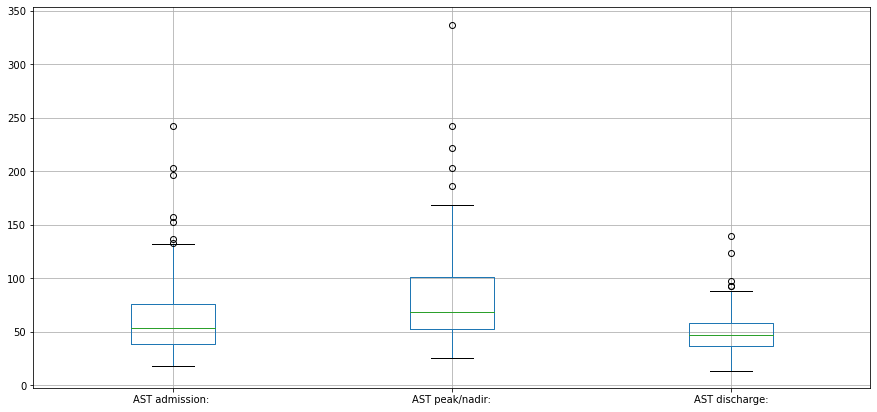

In [188]:
df_ast = pd.DataFrame(df_patients, columns=['AST admission: ', 'AST peak/nadir:', 'AST discharge:'])
df_ast.plot.box(figsize=(15, 7), grid = True)

<AxesSubplot:>

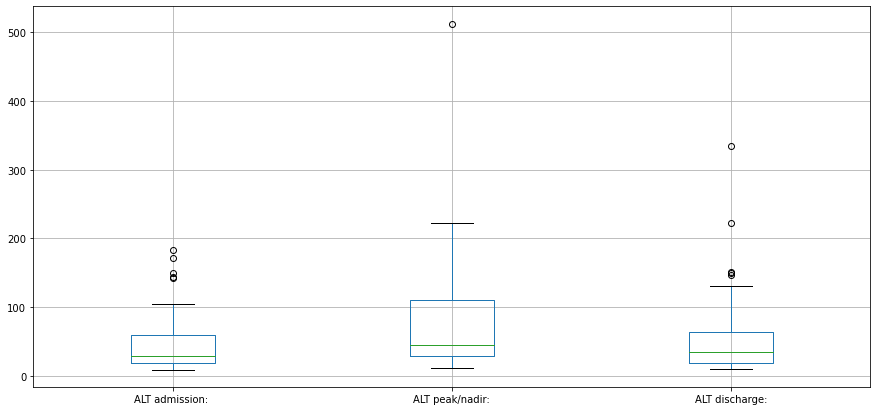

In [189]:
df_alt = pd.DataFrame(df_patients, columns=['ALT admission: ', 'ALT peak/nadir:', 'ALT discharge:'])
df_alt.plot.box(figsize=(15, 7), grid = True)

<AxesSubplot:>

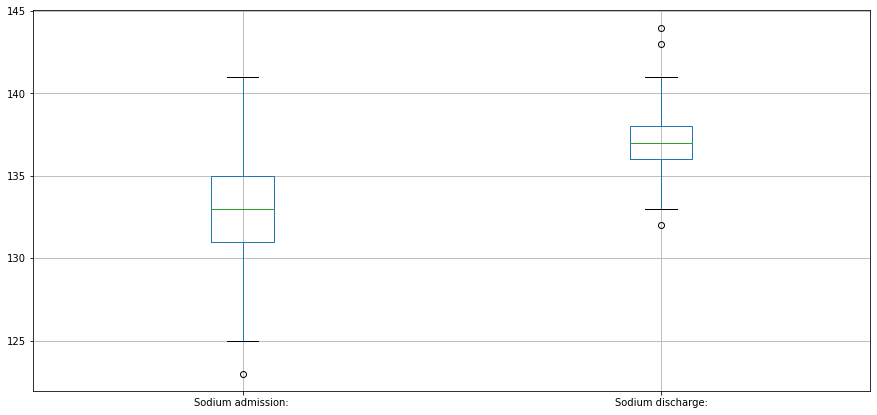

In [190]:
df_sod = pd.DataFrame(df_patients, columns=['Sodium admission: ', 'Sodium peak/nadir:', 'Sodium discharge:'])
df_sod.plot.box(figsize=(15, 7), grid = True)

<AxesSubplot:>

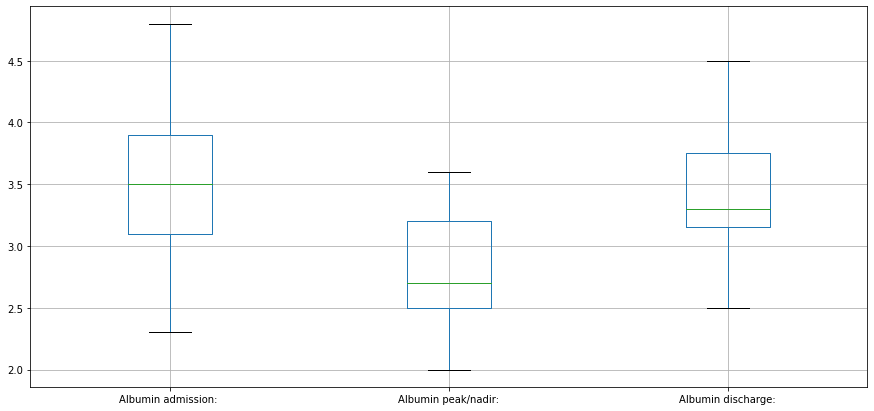

In [191]:
df_alb = pd.DataFrame(df_patients, columns=['Albumin admission: ', 'Albumin peak/nadir:', 'Albumin discharge:'])
df_alb.plot.box(figsize=(15, 7), grid = True)

In [ ]:
df_trop = pd.DataFrame(df_patients, columns=['Troponin admission: ', 'Troponin peak/nadir:', 'Troponin discharge:'])
df_trop.plot.box(figsize=(15, 7), grid = True)

In [ ]:
df_bnp = pd.DataFrame(df_patients, columns=['BNP admission: ', 'BNP peak/nadir:', 'BNP discharge:'])
df_bnp.plot.box(figsize=(15, 7), grid = True)

<AxesSubplot:>

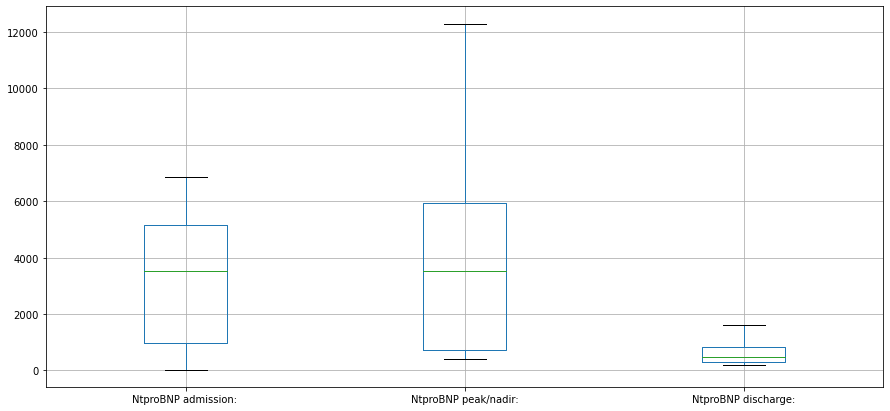

In [194]:
df_ntpro = pd.DataFrame(df_patients, columns=['NtproBNP admission: ', 'NtproBNP peak/nadir:', 'NtproBNP discharge:'])
df_ntpro.plot.box(figsize=(15, 7), grid = True)

In [ ]:
df_ddim = pd.DataFrame(df_patients, columns=['D-Dimer admission: ', 'D-Dimer peak/nadir:', 'D-Dimer discharge:'])
df_ddim.plot.box(figsize=(15, 7), grid = True)

<AxesSubplot:>

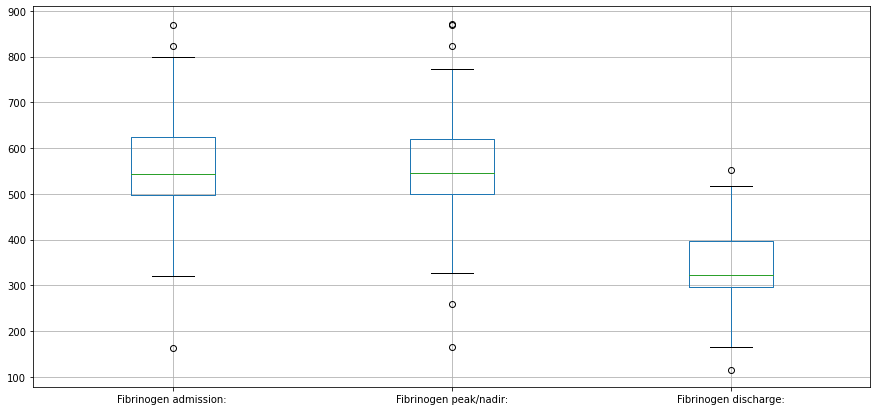

In [196]:
df_fib = pd.DataFrame(df_patients, columns=['Fibrinogen admission: ', 'Fibrinogen peak/nadir:', 'Fibrinogen discharge:'])
df_fib.plot.box(figsize=(15, 7), grid = True)

<AxesSubplot:ylabel='UA with pyuria?'>

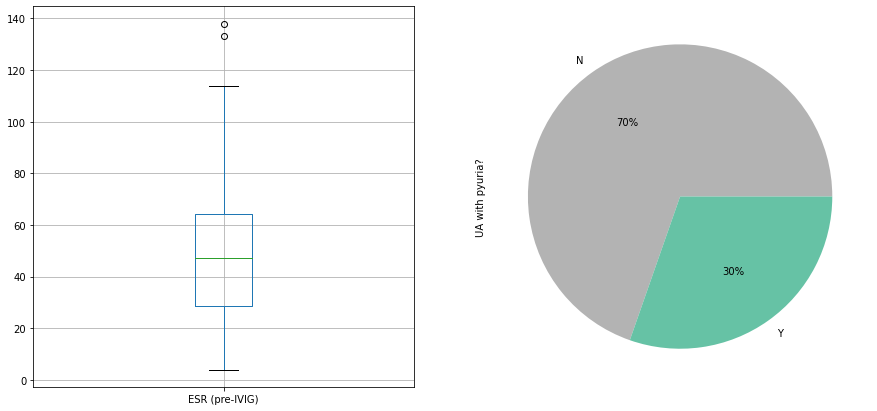

In [197]:
fig, axs = plt.subplots(1,2)
df_patients['ESR (pre-IVIG)'].plot.box(figsize=(15, 7), ax=axs[0], grid = True)
df_patients['UA with pyuria?'].value_counts().plot.pie(figsize=(15,7), ax=axs[1], colormap = 'Set2_r', autopct='%1.0f%%')

In [ ]:
fig, axs = plt.subplots(1,2)
df_patients['LDH'].plot.box(figsize=(15, 7), ax=axs[0], grid = True)
df_patients['procalcitonin'].plot.box(figsize=(15, 7), ax=axs[1], grid = True)

<AxesSubplot:ylabel='other infectious tests positive?'>

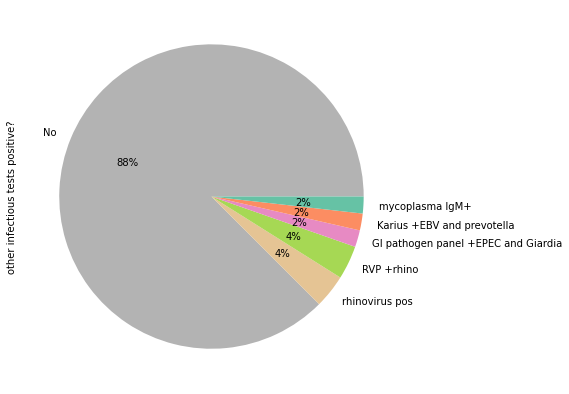

In [200]:
df_patients['other infectious tests positive?'].value_counts().plot.pie(figsize=(15,7), colormap = 'Set2_r', autopct='%1.0f%%')

<AxesSubplot:ylabel='Typhus IgG Titer'>

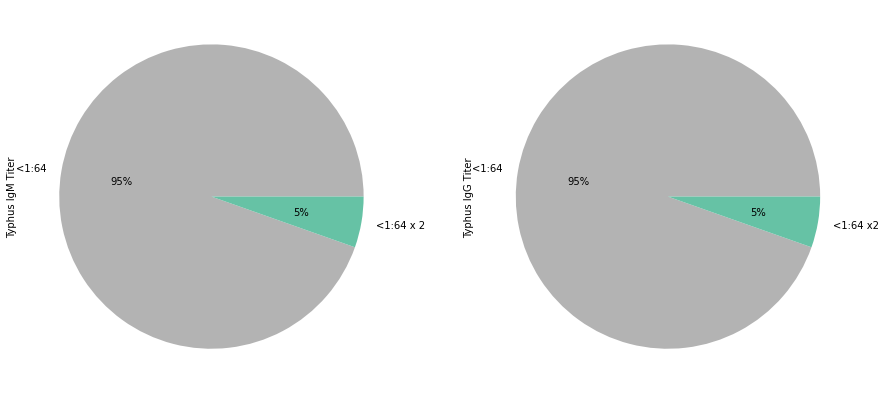

In [201]:
fig, axs = plt.subplots(1,2)
df_patients['Typhus IgM Titer'].value_counts().plot.pie(ax = axs[0], figsize=(15,7), colormap = 'Set2_r', autopct='%1.0f%%')
df_patients['Typhus IgG Titer'].value_counts().plot.pie(ax = axs[1], figsize=(15,7), colormap = 'Set2_r', autopct='%1.0f%%')

<AxesSubplot:ylabel='SARS-CoV-2 nasal PCR (subsequent positive?)'>

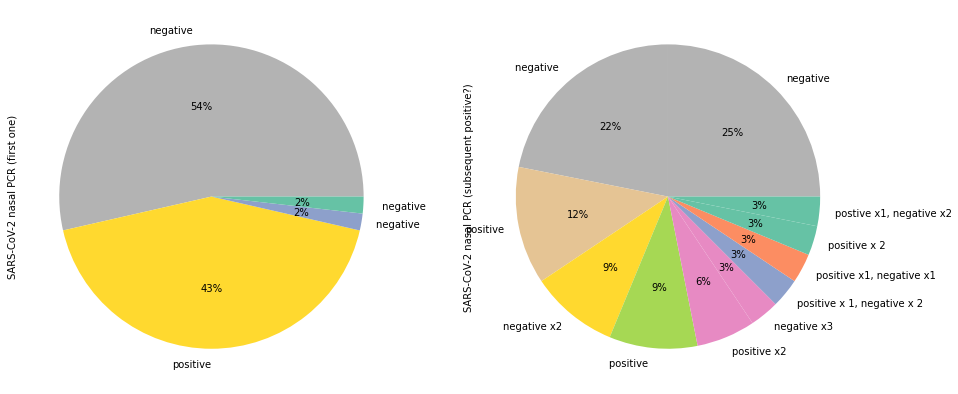

In [206]:
fig, axs = plt.subplots(1,2)
df_patients['SARS-CoV-2 nasal PCR (first one)'].value_counts().plot.pie(ax = axs[0], figsize=(15,7), colormap = 'Set2_r', autopct='%1.0f%%')
df_patients['SARS-CoV-2 nasal PCR (subsequent positive?)'].value_counts().plot.pie(ax = axs[1], figsize=(15,7), colormap = 'Set2_r', autopct='%1.0f%%')

<AxesSubplot:ylabel='EKG abnormality (NOT counting nonspecific ST abnormality OR other nonspecific)--cyan row summary of row below'>

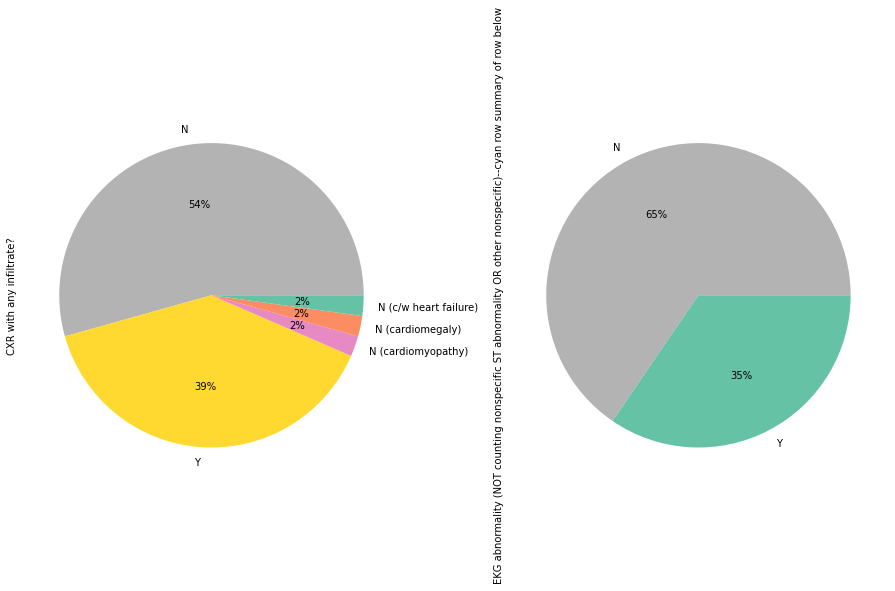

In [204]:
fig, axs = plt.subplots(1,2)
df_patients['CXR with any infiltrate?'].value_counts().plot.pie(ax = axs[0], figsize=(16,7), colormap = 'Set2_r', autopct='%1.0f%%')
df_patients['EKG abnormality (NOT counting nonspecific ST abnormality OR other nonspecific)--cyan row summary of row below'].value_counts().plot.pie(ax = axs[1], figsize=(16,7), colormap = 'Set2_r', autopct='%1.0f%%')

<AxesSubplot:ylabel='MOST RECENT echo other coronary change'>

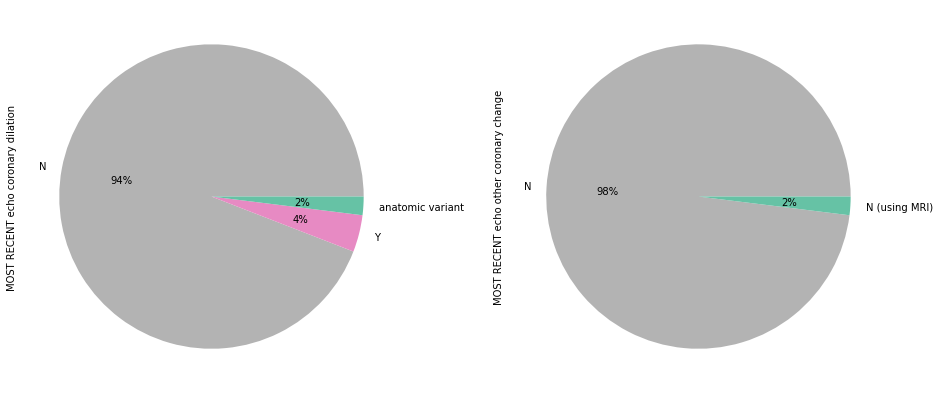

In [207]:
fig, axs = plt.subplots(1,2)
df_patients['MOST RECENT echo coronary dilation'].value_counts().plot.pie(ax = axs[0], figsize=(16,7), colormap = 'Set2_r', autopct='%1.0f%%')
df_patients['MOST RECENT echo other coronary change'].value_counts().plot.pie(ax = axs[1], figsize=(16,7), colormap = 'Set2_r', autopct='%1.0f%%')

<AxesSubplot:ylabel='MOST RECENT echo other (what)'>

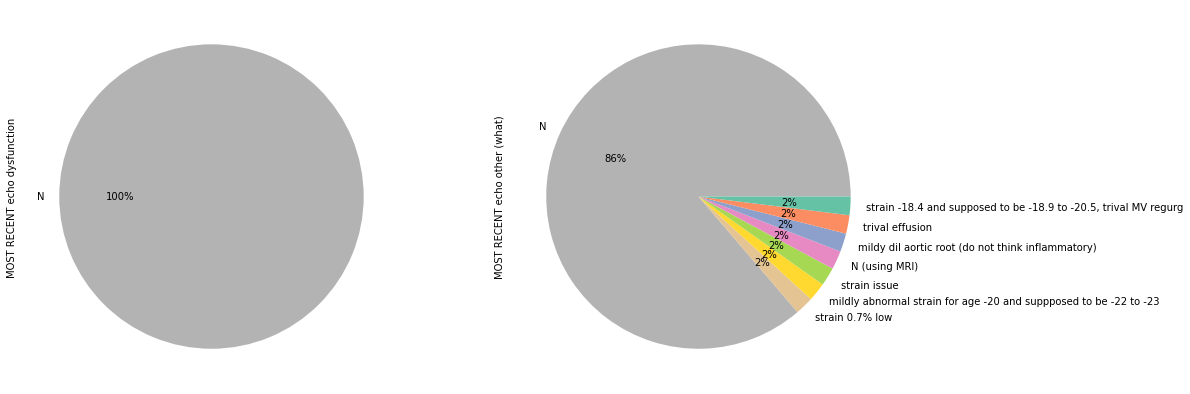

In [208]:
fig, axs = plt.subplots(1,2)
df_patients['MOST RECENT echo dysfunction'].value_counts().plot.pie(ax = axs[0], figsize=(16,7), colormap = 'Set2_r', autopct='%1.0f%%')
df_patients['MOST RECENT echo other (what)'].value_counts().plot.pie(ax = axs[1], figsize=(16,7), colormap = 'Set2_r', autopct='%1.0f%%')

<AxesSubplot:ylabel='If no, ED presentation within first 6 hours met SIRS criteria'>

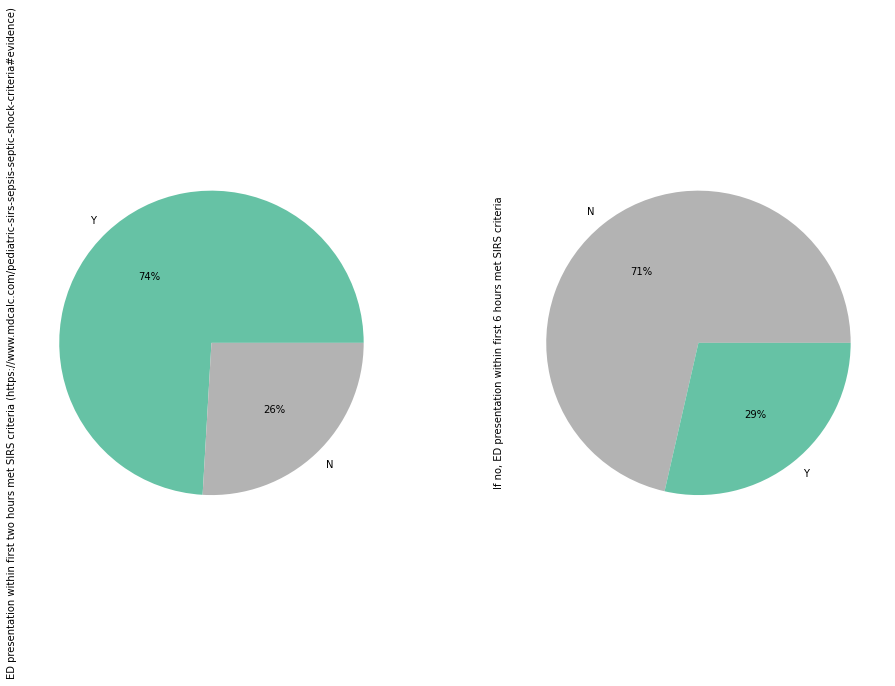

In [210]:
fig, axs = plt.subplots(1,2)
df_patients['ED presentation within first two hours met SIRS criteria (https://www.mdcalc.com/pediatric-sirs-sepsis-septic-shock-criteria#evidence)'].value_counts().plot.pie(ax = axs[0], figsize=(16,7), colormap = 'Set2', autopct='%1.0f%%')
df_patients['If no, ED presentation within first 6 hours met SIRS criteria'].value_counts().plot.pie(ax = axs[1], figsize=(16,7), colormap = 'Set2_r', autopct='%1.0f%%')

<AxesSubplot:ylabel='Free text details to above'>

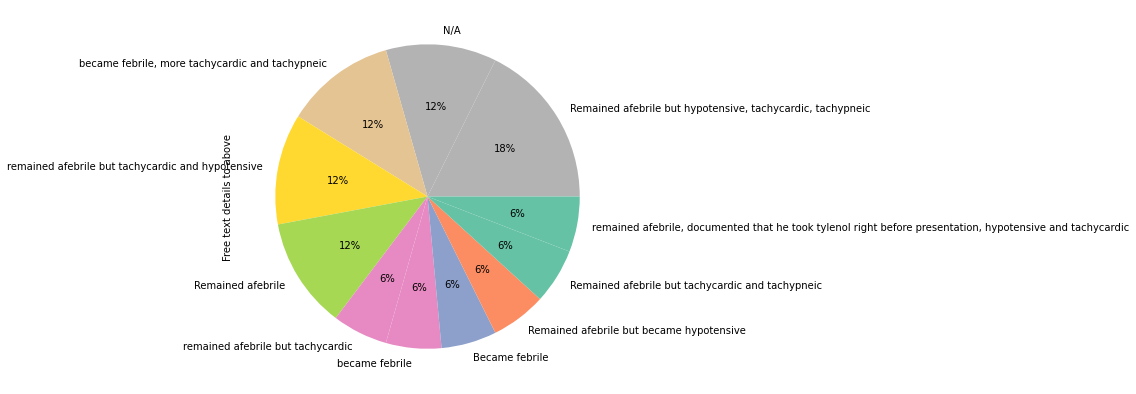

In [211]:
df_patients['Free text details to above'].value_counts().plot.pie(figsize=(16,7), colormap = 'Set2_r', autopct='%1.0f%%')

<AxesSubplot:>

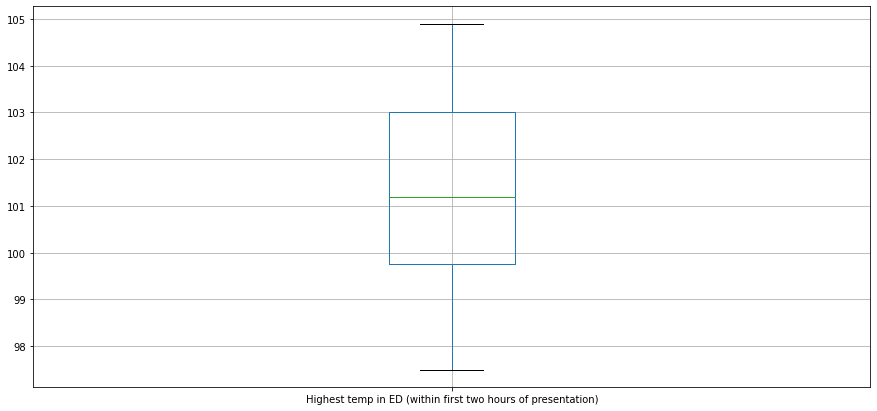

In [212]:
df_patients['Highest temp in ED (within first two hours of presentation)'].plot.box(figsize=(15, 7), grid = True)

<AxesSubplot:>

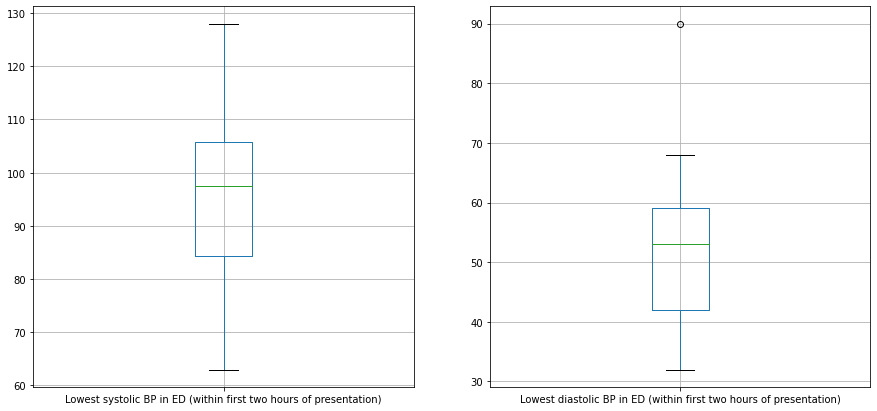

In [214]:
fig, axs = plt.subplots(1,2)
df_patients['Lowest systolic BP in ED (within first two hours of presentation)'].plot.box(ax = axs[0], figsize=(15, 7), grid = True)
df_patients['Lowest diastolic BP in ED (within first two hours of presentation)'].plot.box(ax = axs[1], figsize=(15, 7), grid = True)

<AxesSubplot:>

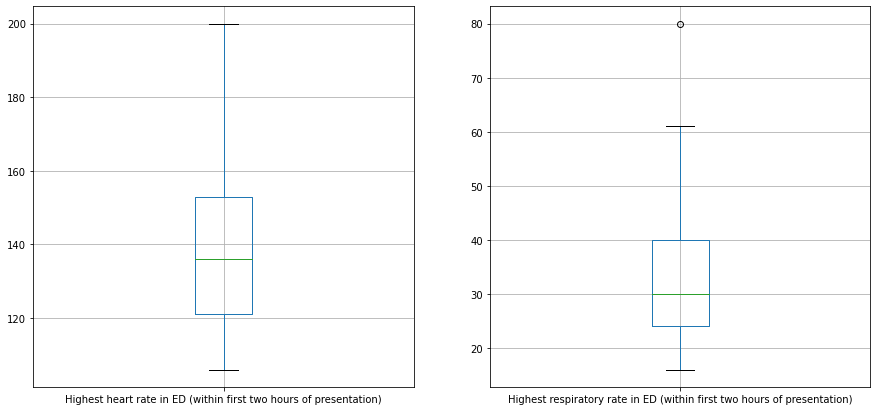

In [215]:
fig, axs = plt.subplots(1,2)
df_patients['Highest heart rate in ED (within first two hours of presentation)'].plot.box(ax = axs[0], figsize=(15, 7), grid = True)
df_patients['Highest respiratory rate in ED (within first two hours of presentation)'].plot.box(ax = axs[1], figsize=(15, 7), grid = True)